In [183]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_excel('house_dataset_baku.xlsx')

df.head(5)

,category,price,currency,price_1m2,title,address,area,title_deed,repair,room_number,region,region_new
0,kohne,137 000,AZN,2 630 AZN/m²,"Satilir 3 otaqli kohne tikili 52 m², 8-ci kilo...",Elshen Suleymanov kuc 137,52 m²,var,var,3,8-ci kilometr,Nizami
1,yeni,183 000,AZN,1 790 AZN/m²,"Satilir 2 otaqli yeni tikili 102 m², Neftchile...",Mehdi Abbasov kucesi,102 m²,yoxdur,var,2,Neftchiler,Nizami
2,kohne,145 000,AZN,2 230 AZN/m²,"Satilir 2 otaqli kohne tikili 65 m², Nerimanov r.",Ataturk Prospekti,65 m²,var,var,2,Nerimanov,Nerimanov
3,kohne,190 000,AZN,2 000 AZN/m²,"Satilir 3 otaqli kohne tikili 95 m², Genclik m.",Ataturk pr,95 m²,var,var,3,Genclik,Nerimanov
4,yeni,294 000,AZN,1 550 AZN/m²,"Satilir 3 otaqli yeni tikili 190 m², Nesimi r.",Mohsun Senani kucesi,190 m²,var,yoxdur,3,Nesimi,Nerimanov


# Dropping duplicates and unnecessary, categorical features

In [184]:
df = df.drop(columns=['region', 'address', 'currency', 'title', 'price_1m2', 'category', 'title_deed', 'repair'])
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22535 entries, 0 to 35454
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   price        22535 non-null  object
 1   area         22535 non-null  object
 2   room_number  22535 non-null  int64 
 3   region_new   22535 non-null  object
dtypes: int64(1), object(3)
memory usage: 880.3+ KB


# Converting selected features from object to integer variable

In [185]:
df['price'] = df['price'].astype(str).str.replace(' ', '').astype(int)
df['area'] = df['area'].astype(str).str.replace('m²', '', regex=False).str.replace(' ', '').str.split('.').str[0].astype(int)

df.head(5)

,price,area,room_number,region_new
0,137000,52,3,Nizami
1,183000,102,2,Nizami
2,145000,65,2,Nerimanov
3,190000,95,3,Nerimanov
4,294000,190,3,Nerimanov


# Plotting the scatter graph between features

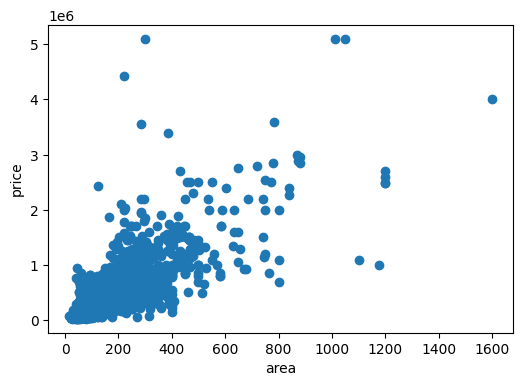

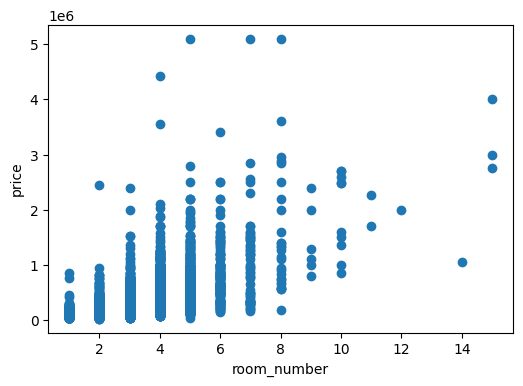

In [186]:
features = ['area', 'room_number']

for col in features:
    plt.figure(figsize=(6,4))
    plt.scatter(df[col], df['price'])
    plt.xlabel(col)
    plt.ylabel('price')
    plt.show()

# From the graph, it is clear that our data has some extreme outliers, and also **region_new** feature is not linear because house prices in some region are much higher than others. We need to remove outliers and select one specific region for our model

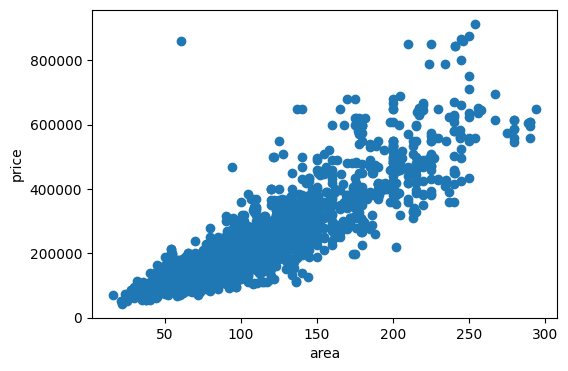

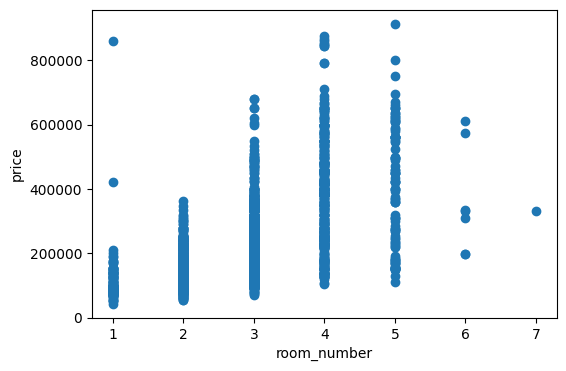

In [187]:
region_df = df[df['region_new'] == 'Nizami']
df_clean = region_df[(region_df['price'] < 1000000) & (region_df['room_number'] < 12) & (region_df['area'] < 300)].reset_index(drop=True)
features = ['area', 'room_number']

for col in features:
    plt.figure(figsize=(6,4))
    plt.scatter(df_clean[col], df_clean['price'])
    plt.xlabel(col)
    plt.ylabel('price')
    plt.show()

# Feature and target selection

In [188]:
X = df_clean[['area', 'room_number']]
y = df_clean[['price']]
X.head()

,area,room_number
0,52,3
1,102,2
2,55,2
3,64,2
4,149,3


# Data splitting

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,area,room_number
569,117,3
671,65,2
2279,68,2
583,110,3
384,75,2
...,...,...
1319,90,3
778,123,2
62,54,2
1371,60,2


# Model training and evalution

In [190]:
model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8090200226487558

# Prediction and visualization

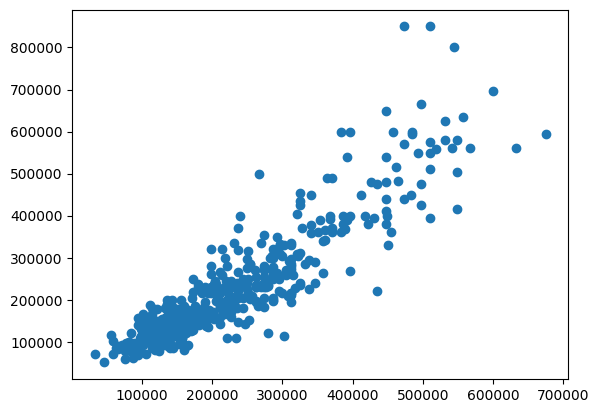

In [191]:
predictions = model.predict(X_test)
plt.scatter(predictions, y_test)

# Model evalution using the $R^2$ score

In [192]:
r2 = r2_score(y_test, predictions)
r2

0.8090200226487558